# Flower Classification Using Transfer Learning

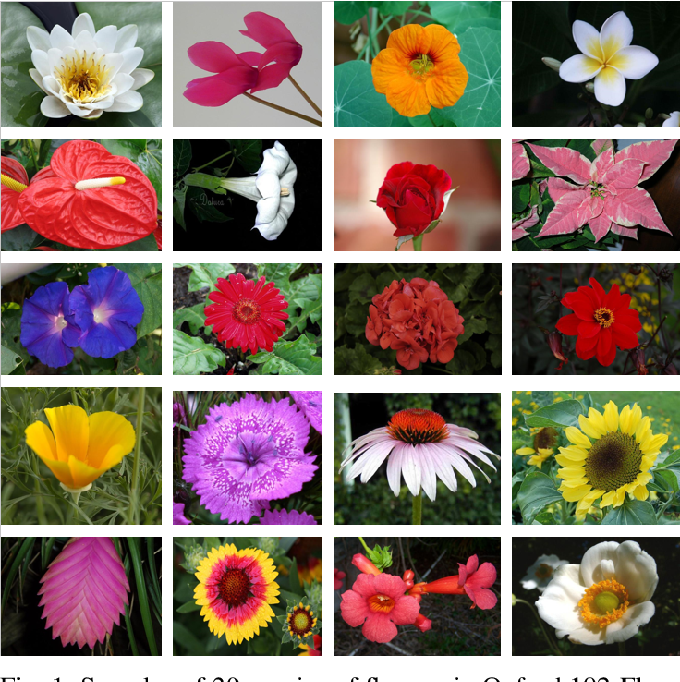

**Dataset: 102 Flowers Dataset Oxford** 

**Pretrained Model Used: ResNet50** 

**Author: Aditya Kulshrestha**

## Importing Libraries

In [1]:
import scipy.io
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
import os 
import cv2 
import numpy as np
import random
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data_dir = './images/jpg/'
image_path = sorted(os.listdir(data_dir))

In [3]:
mat = scipy.io.loadmat('./imagelabels.mat')
labels = mat['labels'][0]
labels

array([77, 77, 77, ..., 62, 62, 62], dtype=uint8)

## EDA 

### Sample Image

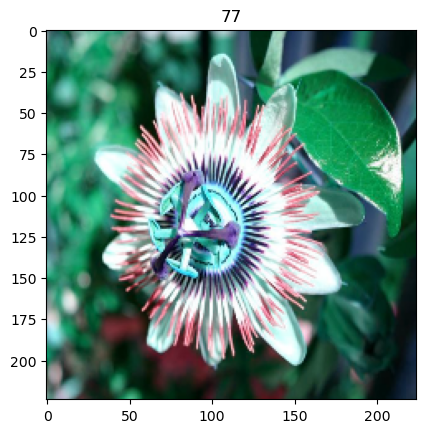

In [4]:
img = cv2.imread(data_dir+image_path[0])
img = cv2.resize(img, (224,224))
plt.imshow(img)
plt.title(labels[0])
plt.show()

In [5]:
label_names = {
 1: 'pink primrose',
 2: 'hard-leaved pocket orchid',
 3: 'canterbury bells',
 4: 'sweet pea',
 5: 'english marigold',
 6: 'tiger lily',
 7: 'moon orchid',
 8: 'bird of paradise',
 9: 'monkshood',
 10: 'globe thistle',
 11: 'snapdragon',
 12: "colt's foot",
 13: 'king protea',
 14: 'spear thistle',
 15: 'yellow iris',
 16: 'globe-flower',
 17: 'purple coneflower',
 18: 'peruvian lily',
 19: 'balloon flower',
 20: 'giant white arum lily',
 21: 'fire lily',
 22: 'pincushion flower',
 23: 'fritillary',
 24: 'red ginger',
 25: 'grape hyacinth',
 26: 'corn poppy',
 27: 'prince of wales feathers',
 28: 'stemless gentian',
 29: 'artichoke',
 30: 'sweet william',
 31: 'carnation',
 32: 'garden phlox',
 33: 'love in the mist',
 34: 'mexican aster',
 35: 'alpine sea holly',
 36: 'ruby-lipped cattleya',
 37: 'cape flower',
 38: 'great masterwort',
 39: 'siam tulip',
 40: 'lenten rose',
 41: 'barbeton daisy',
 42: 'daffodil',
 43: 'sword lily',
 44: 'poinsettia',
 45: 'bolero deep blue',
 46: 'wallflower',
 47: 'marigold',
 48: 'buttercup',
 49: 'oxeye daisy',
 50: 'common dandelion',
 51: 'petunia',
 52: 'wild pansy',
 53: 'primula',
 54: 'sunflower',
 55: 'pelargonium',
 56: 'bishop of llandaff',
 57: 'gaura',
 58: 'geranium',
 59: 'orange dahlia',
 60: 'pink-yellow dahlia?',
 61: 'cautleya spicata',
 62: 'japanese anemone',
 63: 'black-eyed susan',
 64: 'silverbush',
 65: 'californian poppy',
 66: 'osteospermum',
 67: 'spring crocus',
 68: 'bearded iris',
 69: 'windflower',
 70: 'tree poppy',
 71: 'gazania',
 72: 'azalea',
 73: 'water lily',
 74: 'rose',
 75: 'thorn apple',
 76: 'morning glory',
 77: 'passion flower',
 78: 'lotus',
 79: 'toad lily',
 80: 'anthurium',
 81: 'frangipani',
 82: 'clematis',
 83: 'hibiscus',
 84: 'columbine',
 85: 'desert-rose',
 86: 'tree mallow',
 87: 'magnolia',
 88: 'cyclamen ',
 89: 'watercress',
 90: 'canna lily',
 91: 'hippeastrum ',
 92: 'bee balm',
 93: 'ball moss',
 94: 'foxglove',
 95: 'bougainvillea',
 96: 'camellia',
 97: 'mallow',
 98: 'mexican petunia',
 99: 'bromelia',
 100: 'blanket flower',
 101: 'trumpet creeper',
 102: 'blackberry lily'}

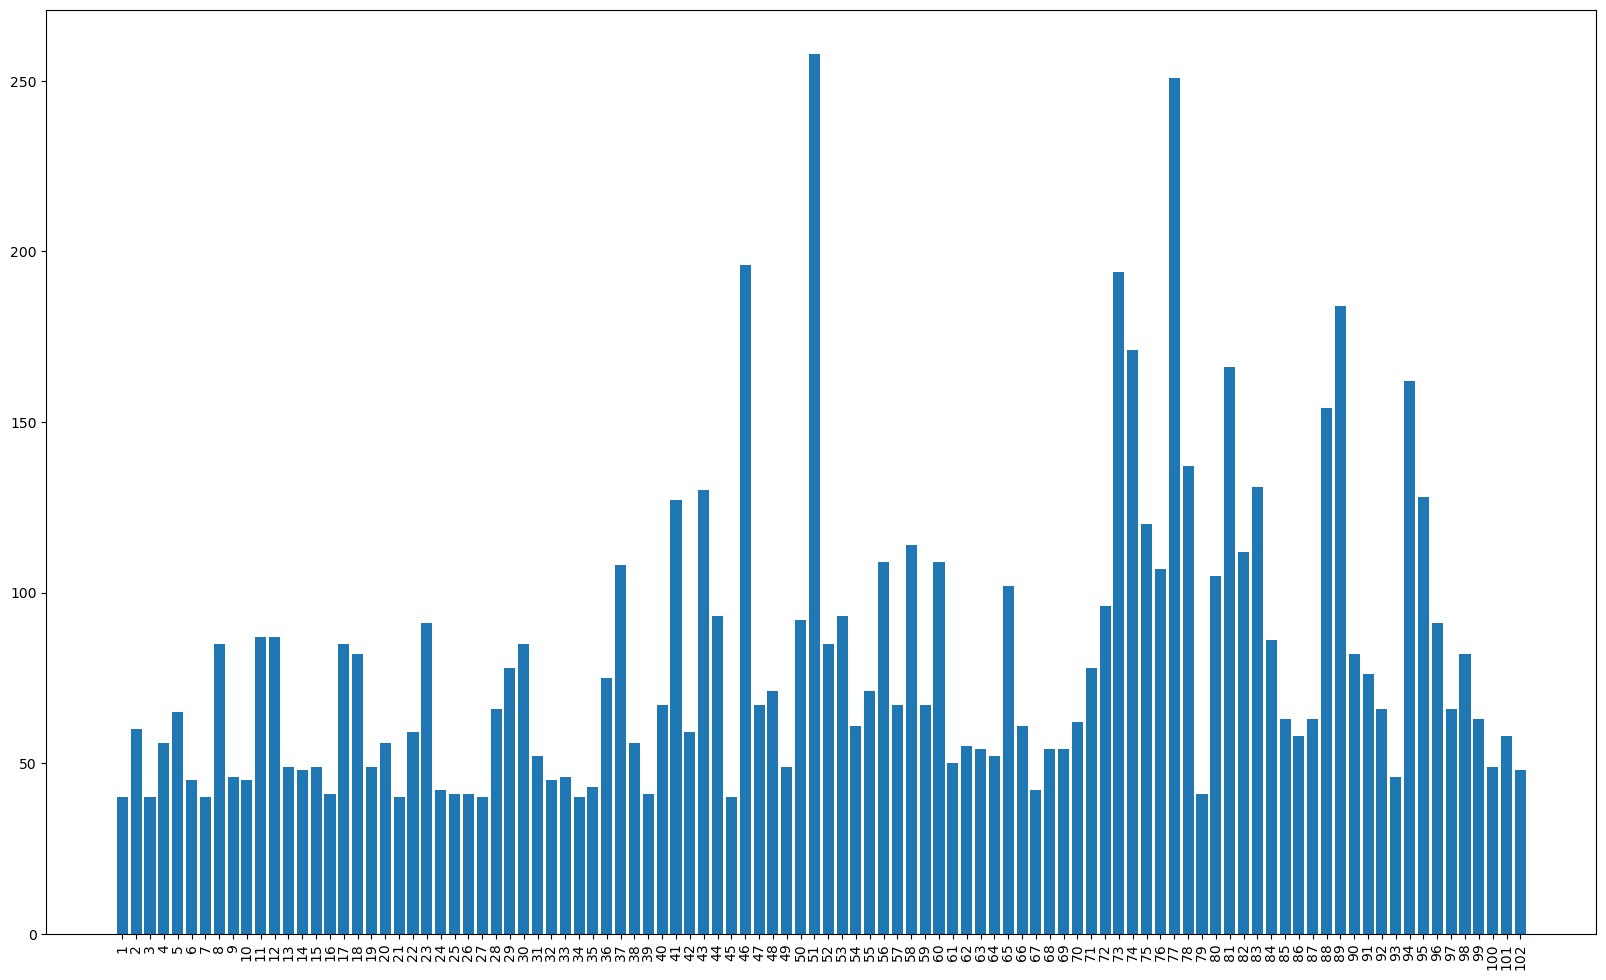

In [6]:
plt.figure(figsize = (20,12))
labels = np.array(labels)
lbl, frequency = np.unique(labels, return_counts=True)
plt.bar(lbl,frequency)
plt.xticks(lbl, rotation = 90)  
plt.show()

## Importing the images 

In [7]:
IMG_SIZE = 224 
BATCH_SIZE = 32

### Converting the Ordinal Encodings to One-Hot Encodings

In our classification task the default encodings were given. There is no natural ranking. Hence we will be using one-hot encodings. 
In this way the model doesn't develop a ranking order. 

In [8]:
# Since the tensorflow provides the 0 based one-hot encoding. 
# Hence starting the categorical values from 0
labels = labels - 1
label_onehot = tf.keras.utils.to_categorical(
    labels, num_classes=102)

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
                        './images/',
                        labels = list(label_onehot),
                        validation_split = 0.2,
                        subset = 'training',
                        label_mode = 'int',
                        seed = 123,
                        image_size = (224,224),
                        batch_size = 32)

valid_ds = tf.keras.utils.image_dataset_from_directory(
                        './images/',
                        labels = list(label_onehot),
                        validation_split = 0.2,
                        subset = 'validation',
                        seed = 123,
                        label_mode = 'int',
                        image_size = (224,224),
                        batch_size = 32)

Found 8189 files belonging to 1 classes.
Using 6552 files for training.
Found 8189 files belonging to 1 classes.
Using 1637 files for validation.


## Samples

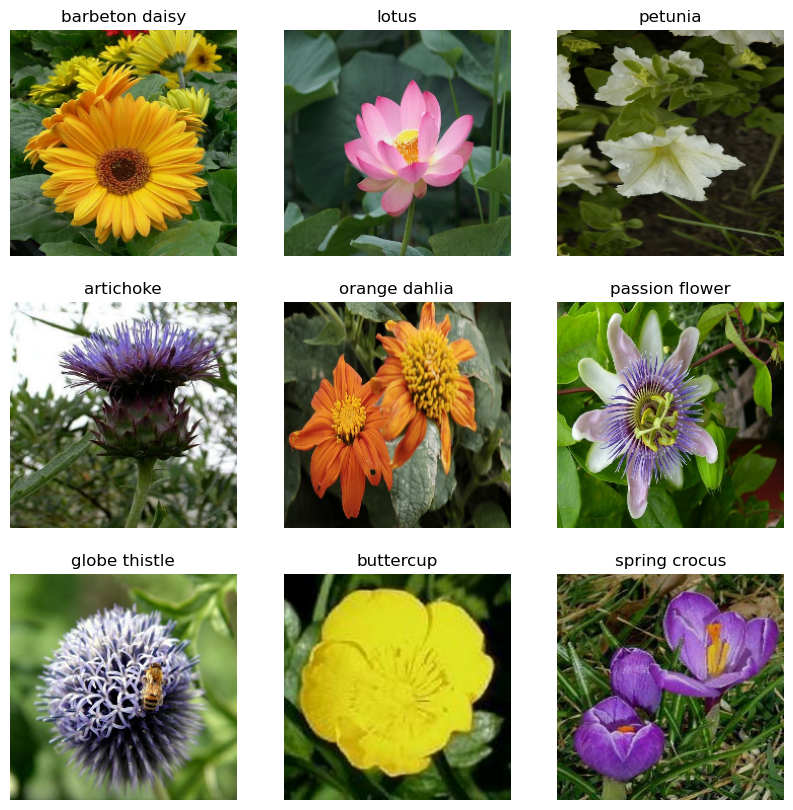

In [10]:
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(label_names[int(np.argmax(label[i]))+1])
    plt.axis("off")

In [11]:
for img_batch, label_batch in train_ds:
    print(img_batch.shape) 
    print(label_batch.shape)
    break

(32, 224, 224, 3)
(32, 102)


In [12]:
train_batches = tf.data.experimental.cardinality(train_ds)
test_ds = train_ds.take(train_batches // 5)
train_ds = train_ds.skip(train_batches // 5)

## Prefetching 

Prefetching overlaps the preprocessing and model execution of a training step. While the model is executing training step s, the input pipeline is reading the data for step s+1. Doing so reduces the step time to the maximum (as opposed to the sum) of the training and the time it takes to extract the data.



In [13]:
# Setting the number of elements to prefetch to dynamically at runtime
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_ds.prefetch(buffer_size=AUTOTUNE)
validation_dataset = valid_ds.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_ds.prefetch(buffer_size=AUTOTUNE)

In [14]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(train_ds))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(valid_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 164
Number of validation batches: 52
Number of test batches: 41


## Data Augmentation

Data augmentation is a set of techniques to artificially increase the amount of data by generating new data points from existing data. This includes making small changes to data or using deep learning models to generate new data points.

Data augmentation is useful to improve the performance and outcomes of machine learning models by forming new and different examples to train datasets. If the dataset in a machine learning model is rich and sufficient, the model performs better and more accurately.

In [15]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal', input_shape = (IMG_SIZE,IMG_SIZE,3)),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.1)
])

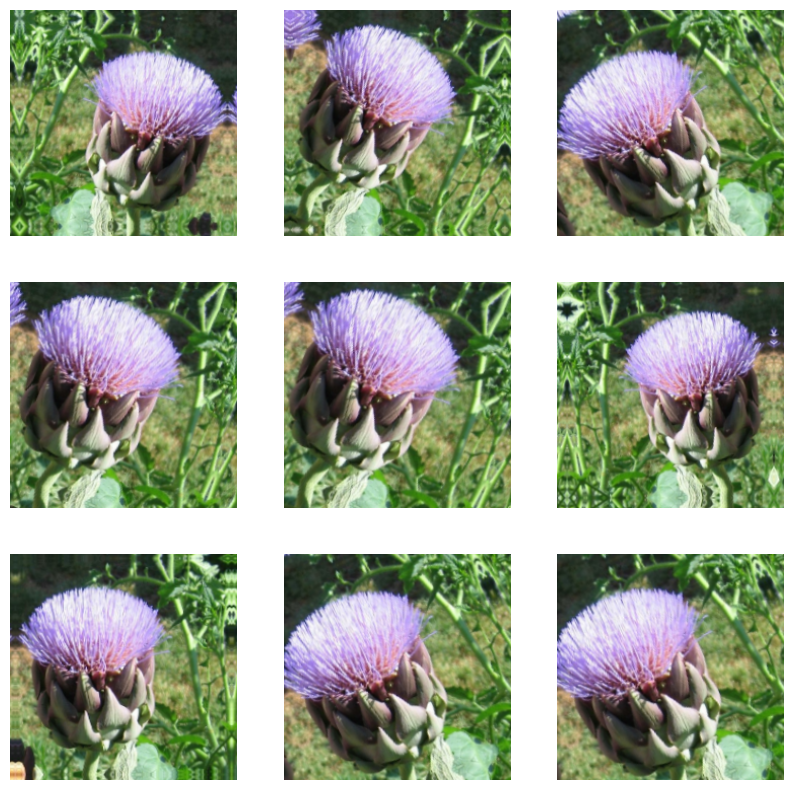

In [16]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Resnet50 

ResNet stands for Residual Network and is a specific type of convolutional neural network (CNN) introduced in the 2015 paper “Deep Residual Learning for Image Recognition” by He Kaiming, Zhang Xiangyu, Ren Shaoqing, and Sun Jian. CNNs are commonly used to power computer vision applications.

ResNet-50 is a 50-layer convolutional neural network (48 convolutional layers, one MaxPool layer, and one average pool layer). Residual neural networks are a type of artificial neural network (ANN) that forms networks by stacking residual blocks.


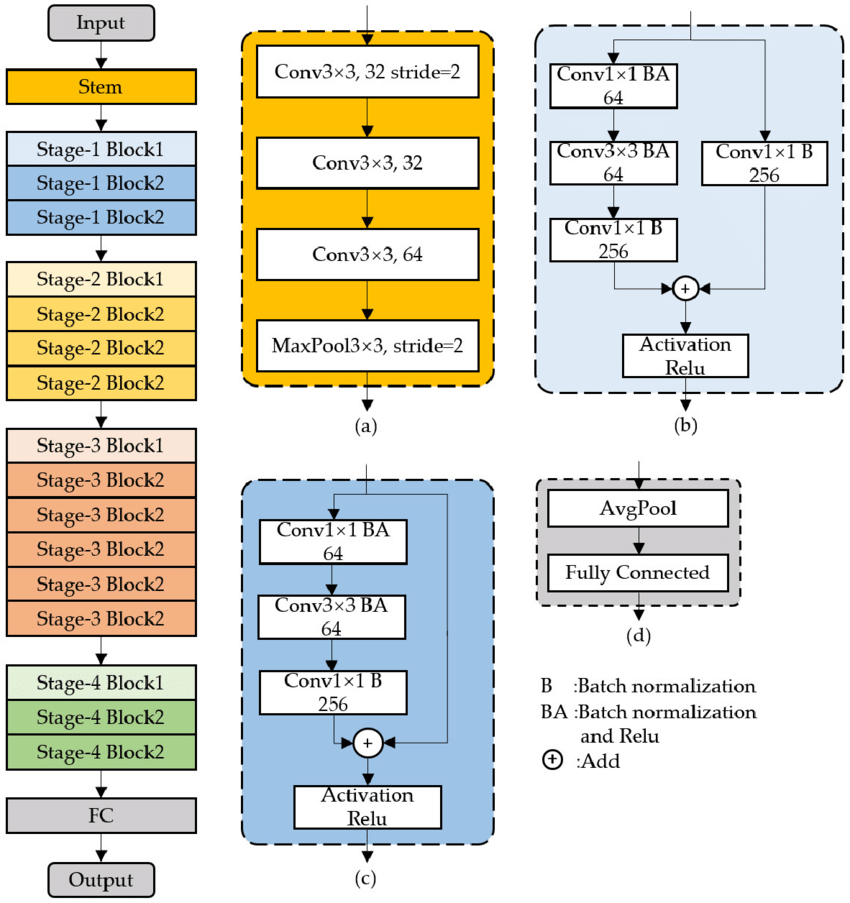

In [17]:
img_shape = (224,224,3)
base = tf.keras.applications.resnet50.ResNet50(input_shape = img_shape, 
                                                include_top = False, 
                                                weights = 'imagenet')

In [18]:
base.trainable = False
base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [19]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base(image_batch)
print(feature_batch.shape)

(32, 7, 7, 2048)


In [20]:
model = tf.keras.Sequential([ 
    data_augmentation,
    base,
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(102, activation = 'softmax')
    
])

model.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False), 
             metrics = ['accuracy'])

In [21]:
model.build(input_shape = (32,224,224,3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 102)               104550    
                                                      

In [22]:
EPOCHS = 20
with tf.device('/gpu:0'):
    history = model.fit(train_dataset, validation_data = validation_dataset, epochs = EPOCHS,batch_size = BATCH_SIZE)

Epoch 1/20
164/164 [==============================] - 77s 417ms/step - loss: 1.9071 - accuracy: 0.5567 - val_loss: 0.8562 - val_accuracy: 0.7660
Epoch 2/20
164/164 [==============================] - 64s 380ms/step - loss: 0.6563 - accuracy: 0.8132 - val_loss: 0.6545 - val_accuracy: 0.8228
Epoch 3/20
164/164 [==============================] - 64s 385ms/step - loss: 0.4290 - accuracy: 0.8716 - val_loss: 0.5625 - val_accuracy: 0.8540
Epoch 4/20
164/164 [==============================] - 65s 389ms/step - loss: 0.3150 - accuracy: 0.9059 - val_loss: 0.5144 - val_accuracy: 0.8754
Epoch 5/20
164/164 [==============================] - 64s 386ms/step - loss: 0.2623 - accuracy: 0.9208 - val_loss: 0.5113 - val_accuracy: 0.8638
Epoch 6/20
164/164 [==============================] - 65s 386ms/step - loss: 0.2284 - accuracy: 0.9313 - val_loss: 0.5126 - val_accuracy: 0.8687
Epoch 7/20
164/164 [==============================] - 64s 386ms/step - loss: 0.1857 - accuracy: 0.9399 - val_loss: 0.5181 - val_ac

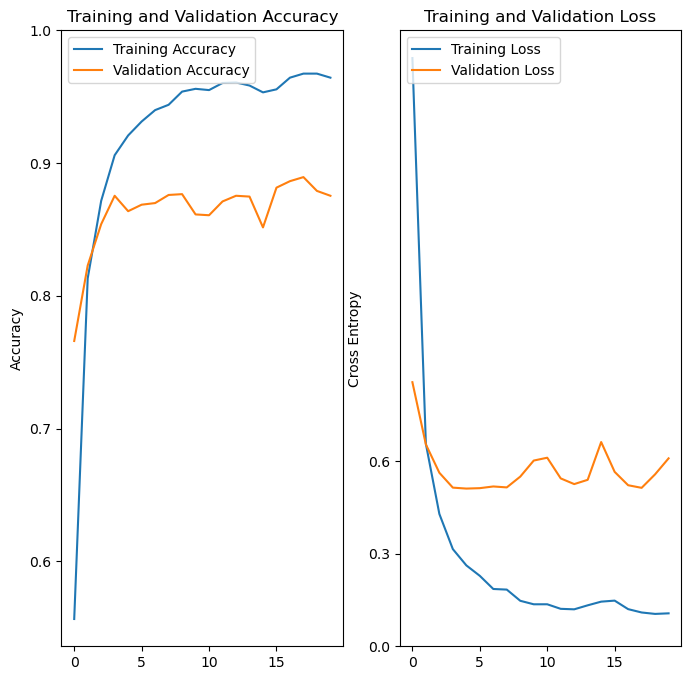

In [23]:
accuracy = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 

loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS) 

plt.figure(figsize = (8,8)) 
plt.subplot(1,2,1) 
plt.plot(epochs_range, accuracy, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy') 
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.legend(loc = 'upper left')
plt.title('Training and Validation Accuracy') 

plt.subplot(1,2,2) 
plt.plot(epochs_range, loss, label = 'Training Loss') 
plt.plot(epochs_range, val_loss, label = 'Validation Loss') 
plt.legend(loc = 'upper left')
plt.ylabel('Cross Entropy')
plt.yticks(np.arange(0,0.8,0.3))
plt.title('Training and Validation Loss') 
plt.show()

## Performance on test dataset

In [24]:
loss, accuracy = model.evaluate(test_dataset)
print("Test accuracy :", accuracy)

41/41 [==============================] - 11s 265ms/step - loss: 0.4777 - accuracy: 0.8910
Test accuracy : 0.8910061120986938


## Inference

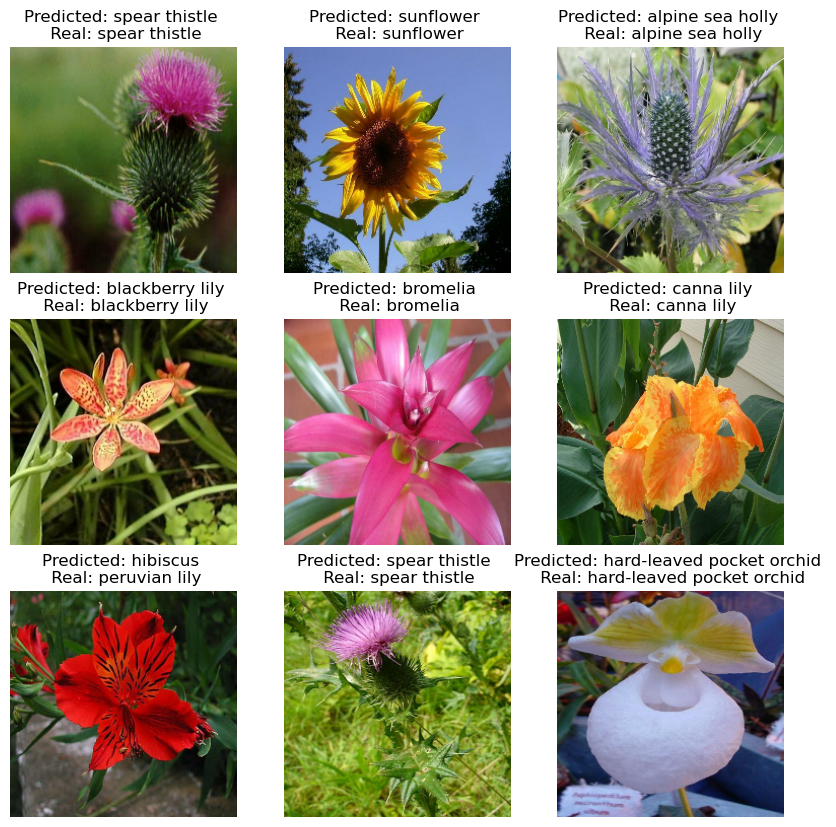

In [25]:
plt.figure(figsize=(10, 10))
for images, label in train_dataset.take(1):
  for i in range(9):
    prediction = model.predict(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title("Predicted: {} \n Real: {}".format((label_names[int(np.argmax(prediction[i]))+1]),(label_names[int(np.argmax(label[i]))+1])))
    plt.axis("off")

## Other Model Performances 
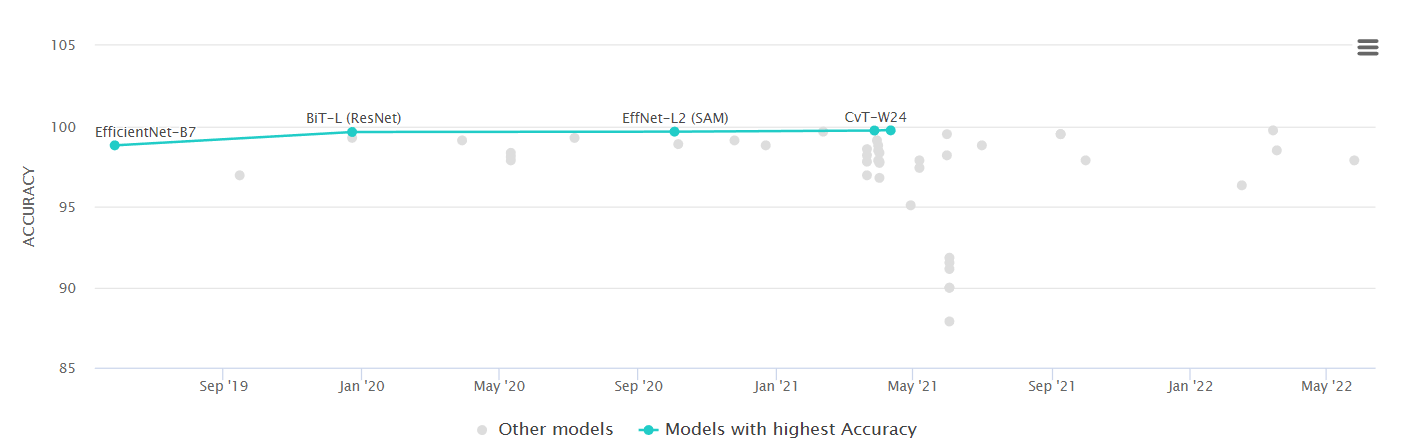
Source - Papers with code

#### Following are the accuracy achieved by various models on this dataset 

- Efficient B7 - 98.8 %
- BiT-L (ResNet) - 99.630 %
- EffNet - L2 (SAM) - 99.650 % 
- CvT - W24 - 99.720 % 
- CCT -14/7x2 - 99.76 (Highest) (Pre training on ImageNet - 1k) 

Note - All these models above have used Extra training data

#### Reasons for better performance: 

- It is to be noted that CCT uses transformer based architecture which is outperformed many other model architectures in various domains. 
- Another reason could be the number of parameters. EfficientNet has approximately thrice times the parameters than ResNet50.
- Pre training - The type of dataset on which the model has been trained on can have significant effect on accuracy achieved using transfer learning.